<img src="istockphoto.jpg" style="width:100%;height:400px"/>

The Credit Card Fraud Detection Problem includes modeling past credit card transactions with
the knowledge of the ones that turned out to be fraud. This model is then used to identify
whether a new transaction is fraudulent or not. 

My aim here is to detect 100% of the fraudulent
transactions while minimizing the incorrect fraud classifications. 

The dataset that is used for credit card fraud detection is derived from the Kaggle
https://www.kaggle.com/mlg-ulb/creditcardfraud
The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.


In [2]:
import pandas as pd
import matplotlib
import csv
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import  Data  and loading our dataset
cards = '/Users/egoretc/Desktop/'
cardsdf=  pd.read_csv(cards + 'creditcard.csv') 
cardsdf.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


# Data Wrangling

First, I need to get to know my dataset.

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues,  the original features and more background information about the data cannot be provided. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. 

In [4]:
#Explore the data
cardsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
#selecting column names
print(cardsdf.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [6]:
#Checking for null values
display(cardsdf.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

The dataset contains no missing values.

In [7]:
# rows and columns
print(cardsdf.shape)

(284807, 31)


In [8]:
#Checking for duplicate values
cardsdf.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 284807, dtype: bool

So I am done with Data Wrangling. I do not have missing values  and duplicates and any dummy columns. I do not have to manipulate data to make it  suitabale for analysis. I am gonna do Exploratory Data Analysis furhter. 

# Exploratory Data Analysis

<img src="panalys.jpg" style="width:100%;height:450px"/>

To be able to analyze the data , I am gonna create labels of our class. If Class is 1 , this is going to be Fraud transaction. If Class is 0, this going to be Normal transaction

In [9]:
#Assigning Class  and outlier fraction 
Fraud = cardsdf[cardsdf['Class']==1]
Normal = cardsdf[cardsdf['Class']==0]
outlier_fraction = len(Fraud)/float(len(Normal))
outlier_fraction

0.0017304750013189597

Next, I will compute and vizualize quantity of Normal vs Fraud transactions.

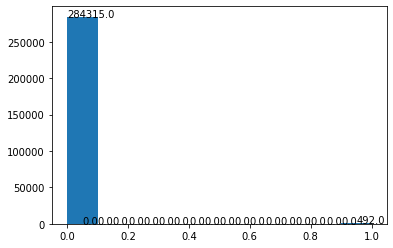

In [10]:
#Counting Fraud and Normal transactions
bins=20
arr=plt.hist(cardsdf.Class, bins=bins)
for i in range(bins):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))
    plt.hist(cardsdf.Class, bins=10)

Now I know Class labels so I can figure out mean of each V by Class.

In [11]:
#taking mean of each variable by Class
print(cardsdf.groupby('Class').mean())

               Time        V1        V2        V3        V4        V5  \
Class                                                                   
0      94838.202258  0.008258 -0.006271  0.012171 -0.007860  0.005453   
1      80746.806911 -4.771948  3.623778 -7.033281  4.542029 -3.151225   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0      0.002419  0.009637 -0.000987  0.004467  ... -0.000644 -0.001235   
1     -1.397737 -5.568731  0.570636 -2.581123  ...  0.372319  0.713588   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0     -0.000024  0.000070  0.000182 -0.000072 -0.000089 -0.000295 -0.000131   
1      0.014049 -0.040308 -0.105130  0.041449  0.051648  0.170575  0.075667   

           Amount  
Class              
0       88.291022  
1      122.211321  

[2 rows x 30

So, taking look at the mean I can tell  that Fraud vs Normal transactions are covariate.  Also, interestingly, Amount of Fraud mean is greater than Amount of Normal mean.

But at what time fraud transaction happened?

In [12]:
Fraud.Time.describe()

count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

So according to this description, Fraud transactions happened between 406sec and 170348sec

Now I just vizualize Time distribution of Fraudalant transactions vs Normal.

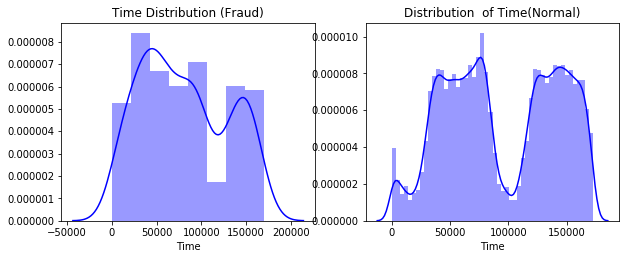

In [13]:
# plot the time feature
plt.figure(figsize=(10,8))

plt.subplot(2, 2, 1)
plt.title('Time Distribution (Fraud)')

sns.distplot(Fraud.Time, color='blue');

#plot the amount feature
plt.subplot(2, 2, 2)
plt.title('Distribution  of Time(Normal)')
sns.distplot(Normal.Time,color='blue');

Even better, I want to select only mean of Fraud transactions to take a closer look because I am interested in exploring Fraud data. 

In [14]:
#selecting mean of Class between when Fraud happened
timestamp = Fraud[(cardsdf['Time'] > 406) & (cardsdf['Time'] < 170348.000000)]
print(timestamp.groupby(['Class','Amount','Time']).mean())

C:\Users\egoretc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


                               V1        V2         V3        V4        V5  \
Class Amount  Time                                                           
1     0.00    12093.0   -4.696795  2.693867  -4.475133  5.467685 -1.556758   
              32686.0    0.287953  1.728735  -1.652173  3.813544 -1.090927   
              41233.0  -10.645800  5.918307 -11.671043  8.807369 -7.975501   
              53658.0   -1.739341  1.344521  -0.534379  3.195291 -0.416196   
              64443.0    1.079524  0.872988  -0.303850  2.755369  0.301688   
...                           ...       ...        ...       ...       ...   
      1389.56 59011.0   -2.326922 -3.348439  -3.513408  3.175060 -2.815137   
      1402.16 62467.0   -5.344665 -0.285760  -3.835616  5.337048 -7.609909   
      1504.93 154278.0  -1.600211 -3.488130  -6.459303  3.246816 -1.614608   
      1809.68 9064.0    -3.499108  0.258555  -4.489558  4.853894 -6.974522   
      2125.87 122608.0  -2.003460 -7.159042  -4.050976  1.309580

It is time to look at what plot will tell about transactions amount of Fraud vs Normal.

C:\Users\egoretc\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


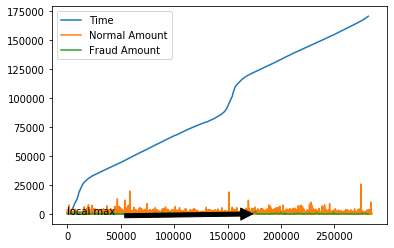

In [43]:
fig, ax = plt.subplots()

ax.plot(Fraud.Time,  label="Time")
ax.plot(Normal.Amount,  label="Normal Amount")
ax.plot(Fraud.Amount, label="Fraud Amount")

plt.annotate('local max', xy=(180300, 100), xytext=(60, 30),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.legend()

plt.show()

Looks interesting.  I can even see the difference. Visually, fraudalant transactions are almost not visible but this is what also happens 

It is time to find out Amount of Fraudalant transactions  vs Normal  for an individual V.

Text(0.5, 0, 'Class')

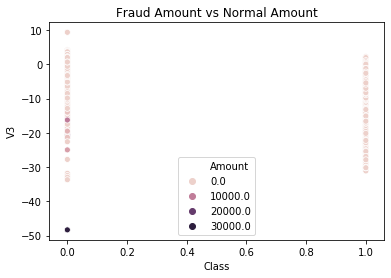

In [16]:
sns.scatterplot(x='Class',

                     y='V3',
                     
                     hue = 'Amount',
                 
                     data=cardsdf

                    ) ;plt.title('Fraud Amount vs Normal Amount');plt.xlabel('Class')

Text(0.5, 0, '')

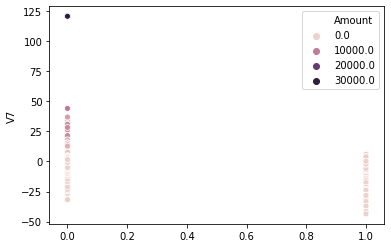

In [82]:
sns.scatterplot(x='Class',

                     y='V7',
                     
                     hue = 'Amount',
                 
                     data=cardsdf

                    ) ;plt.title('Fraud Amount vs Normal Amount');plt.xlabel('Class')

Text(0.5, 0, '')

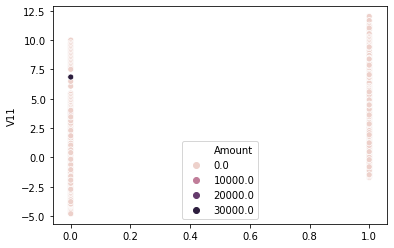

In [83]:
sns.scatterplot(x='Class',

                     y='V11',
                     
                     hue = 'Amount',
                 
                     data=cardsdf

                    ) ;plt.title('Fraud Amount vs Normal Amount');plt.xlabel('Class')

What will correlation matrix will tell?

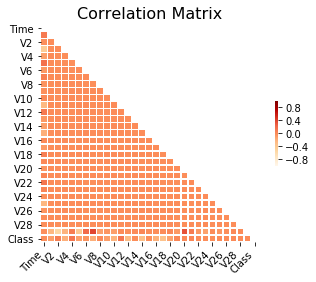

In [37]:
corr = cardsdf.corr()
#plt.rcParams["figure.figsize"] = (10,10)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
ax = sns.heatmap(

    corr, 

    vmin=-1, vmax=1, center=0,
cmap='OrRd',
    #cmap=sns.diverging_palette(250, 15, s=75, l=40,
   #         n=9, center="dark"),
mask=mask, 
square=True,    
linewidths=.3,
cbar_kws={"shrink": .3}, 
  
)

ax.set_xticklabels(

    ax.get_xticklabels(),

    rotation=45,

    horizontalalignment='right'

);


plt.title('Correlation Matrix', fontsize=16);


Almost no correlation is found.  

# Hypothesis

I have a hypothesis about V3 Fraud and V3 Normal  means are not statistically significantly different.

In [38]:
V3groupF = Fraud.V3
n1 = len(V3groupF)
s1 = V3groupF.std()
x1 = V3groupF.mean()
print(n1,s1,x1)

492 7.110937290310505 -7.03328104859655


In [39]:
V3groupN = Fraud.V7
n0 = len(V3groupN)
s0 = V3groupN.std()
x0 = V3groupN.mean()
print(n0,s0,x0)

284315 1.4594290274738517 0.012170917031839727


In [40]:
from scipy.stats import ttest_ind
ttest = ttest_ind(V3groupF, V3groupN, equal_var = False)
ttest

Ttest_indResult(statistic=-21.976004399367977, pvalue=4.7860814074282e-75)

A standard alpha level is .05, and  pvalue= 4.7860814074282e-75 is smaller than .05, so I am going to reject the null hypothesis which asserts there is no difference between our sample mean and the population mean. For this two-tail test, we reject the Null and we conclude that there is statistically significant difference .

In [49]:
import scipy.stats as stats
fvalue, pvalue = stats.f_oneway(cardsdf['V3'], cardsdf['V7'], cardsdf['V11'], cardsdf['V1'])
print(fvalue, pvalue)

2.7549410014881283e-25 1.0


In [51]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols
# reshape the d dataframe suitable for statsmodels package 
d_melt = pd.melt(cardsdf.reset_index(), id_vars=['index'], value_vars=['V3', 'V7', 'V11', 'V1'])
# replace column names
d_melt.columns = ['index', 'transactions', 'value']
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(transactions)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
C(transactions),3.273912e-23,3.0,5.013010e-24,1.0
Residual,2.480026e+06,1139224.0,NaN,NaN
